In [1]:
import scipy as sp
import numpy as np
import qibo
from qibo.symbols import *
from qibo import hamiltonians
import matplotlib.pyplot as plt
from tqdm import tqdm

from functions import *

[Qibo 0.2.16|WARNING|2025-04-10 13:32:09]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
C:\Users\andre\AppData\Local\Temp\ipykernel_468\293697521.py:9: RuntimeWarning: logm result may be inaccurate, approximate err = 9.649865553692925e-13
  Happ = sp.linalg.logm(H)


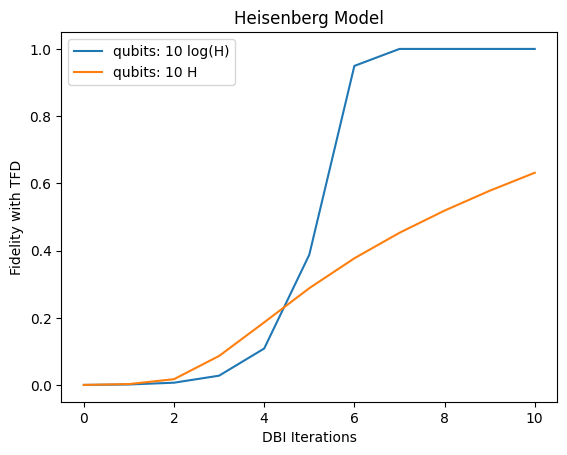

In [32]:

nqubits = [10]
plt.figure()
plt.title('Heisenberg Model')
for i in range(len(nqubits)):
    H_def = sum([Z(x)*Z(x+1) + X(x)*X(x+1) + Y(x)*Y(x+1)  for x in range(nqubits[i]-1)])
    H = hamiltonians.SymbolicHamiltonian(H_def).matrix
    E0 = np.linalg.eigh(H)[0][0]
    H += np.abs(E0)*np.eye(2**nqubits[i])
    Happ = sp.linalg.logm(H)
    refState = np.linalg.eigh(H)[1][:,0]
    initState = np.random.random(2**nqubits[i]) + 1j*np.random.random(2**nqubits[i])
    initState /= np.linalg.norm(initState)
    flog, state, stepsEnergy = optimalDBI(Happ, initState, refState, "DBI", "Energy", 10)
    fEnergy, state, stepsEnergy = optimalDBI(H, initState, refState, "DBI", "Energy", 10)
    plt.plot(flog, label = "qubits: " + str(nqubits[i]) + " log(H)")
    plt.plot(fEnergy, label = "qubits: " + str(nqubits[i]) + " H")

plt.xlabel('DBI Iterations')
plt.ylabel('Fidelity with TFD')
plt.legend()
plt.show()

[Qibo 0.2.16|WARNING|2025-04-10 13:34:14]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


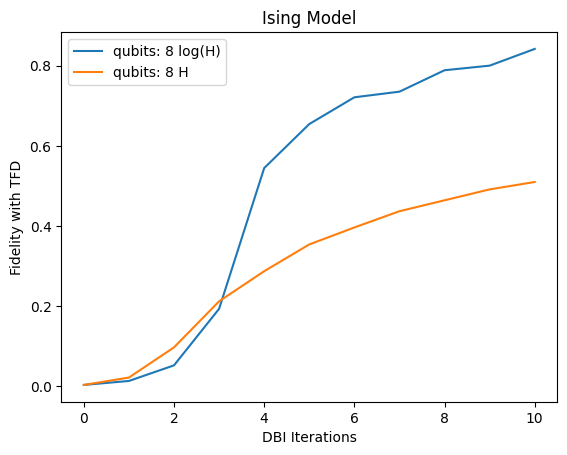

In [37]:

nqubits = [8]
plt.figure()
plt.title('Ising Model')
for i in range(len(nqubits)):
    H_def = sum([-Z(x)*Z(x+1) + X(x)  for x in range(nqubits[i]-1)])
    H = hamiltonians.SymbolicHamiltonian(H_def).matrix
    E0 = np.linalg.eigh(H)[0][0]
    H += np.abs(E0)*np.eye(2**nqubits[i])
    Happ = sp.linalg.logm(H)
    refState = np.linalg.eigh(H)[1][:,0]
    initState = np.random.random(2**nqubits[i]) + 1j*np.random.random(2**nqubits[i])
    initState /= np.linalg.norm(initState)
    flog, state, stepsEnergy = optimalDBI(Happ, initState, refState, "DBI", "Energy", 10)
    fEnergy, state, stepsEnergy = optimalDBI(H, initState, refState, "DBI", "Energy", 10)
    plt.plot(flog, label = "qubits: " + str(nqubits[i]) + " log(H)")
    plt.plot(fEnergy, label = "qubits: " + str(nqubits[i]) + " H")

plt.xlabel('DBI Iterations')
plt.ylabel('Fidelity with TFD')
plt.legend()
plt.show()

[Qibo 0.2.16|WARNING|2025-04-10 13:34:40]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
c:\Users\andre\Desktop\EPFL\Master-Project\Master-Project\functions.py:177: ComplexWarning: Casting complex values to real discards the imaginary part
  steps[i] = s


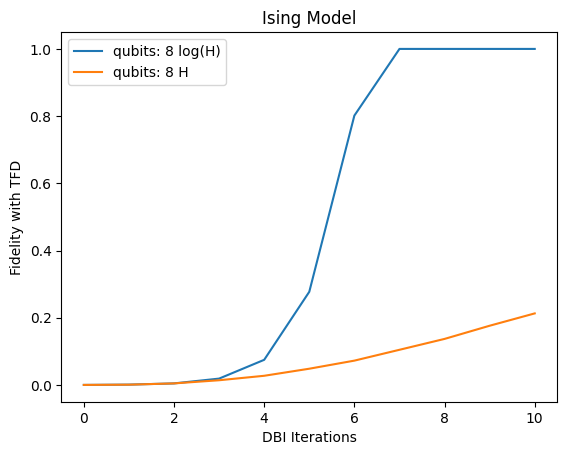

In [38]:

nqubits = [8]
plt.figure()
plt.title('Ising Model')
for i in range(len(nqubits)):
    H_def = sum([X(x+1)*X(x)+Y(x+1)*Y(x)  for x in range(nqubits[i]-1)])
    H = hamiltonians.SymbolicHamiltonian(H_def).matrix
    E0 = np.linalg.eigh(H)[0][0]
    H += np.abs(E0)*np.eye(2**nqubits[i])
    Happ = sp.linalg.logm(H)
    refState = np.linalg.eigh(H)[1][:,0]
    initState = np.random.random(2**nqubits[i]) + 1j*np.random.random(2**nqubits[i])
    initState /= np.linalg.norm(initState)
    flog, state, stepsEnergy = optimalDBI(Happ, initState, refState, "DBI", "Energy", 10)
    fEnergy, state, stepsEnergy = optimalDBI(H, initState, refState, "DBI", "Energy", 10)
    plt.plot(flog, label = "qubits: " + str(nqubits[i]) + " log(H)")
    plt.plot(fEnergy, label = "qubits: " + str(nqubits[i]) + " H")

plt.xlabel('DBI Iterations')
plt.ylabel('Fidelity with TFD')
plt.legend()
plt.show()